# Bayesian Coin Toss

Bayes theorem states that 
$$P(H_i|D,I)=\frac{P(H_i|I) P(D|H_i I)}{P(D|I)}$$

$H_i$ proposition asserting truth of a hypothesis of interest

I is proposition representing prior information

D is proposition represeting data

$P(D|I)$ is a normalisation factor

$P(H_i|D,I)$ is called the posterior. Probability of hypothesis being true given data and prior information.

$P(D|H_i I)$ is called the likelihood. Probability of obtaining the data given that the hypothesis is true

$P(H_i|I)$ is the probability of the hypothesis being true given new data


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import random

maxInt = 2**31-1
N = int(1e3)


class coin(object):
    def __init__(self, bias, initprior = None):
        self.bias = bias
        self.tossL = []
        self.nH = 0
        self.nT = 0
        self.x = np.linspace(0, 1, N)
        self.likelihood = np.ones(N)
        if initprior:
            self.prior = initprior
        else: 
            self.prior = 1/N*np.ones(N)
        self.posterior = np.copy(self.prior)


    def toss(self):
        rnd = np.random.randint(0, maxInt)
        if rnd < int(self.bias * maxInt):
            self.tossL.append(1)
            self.nH += 1
        else: 
            self.tossL.append(0)
            self.nT += 1
        self.bayes(self.posterior) #apply bayes theorem using previous posterior as prior

    def calcLike(self):
        for i in range(0,N):
            p = self.x[i]
            self.likelihood[i] = p**self.nH*(1-p)**self.nT


    def bayes(self, newPrior = None):
        if newPrior is not None:
            self.prior = np.copy(newPrior)
        self.calcLike()
        self.posterior = np.copy(self.prior)*self.likelihood
        self.normalise()


    def normalise(self):
        #normalises the posterior distribution
        norm = 1 / sum(self.posterior)
        self.posterior *= norm

    def plot(self, mode):
        #mode = 0 (prior), 1 (posterior), 2 (likelihood)
        if mode == 0:
            y = self.prior 
            title = "Prior"
        elif mode == 1:
            y = self.posterior
            title = "Posterior"
        elif mode == 2:
            y = self.likelihood
            title = "Likelihood"
        plt.figure()
        plt.title(title)
        plt.xlabel("Proposition of proportion of H")
        plt.ylabel("Distribution")
        plt.xlim([0,1])
        #plt.ylim([0,1])
        plt.plot(self.x,y)
        plt.show()

    def H(self):
        return self.nH

    def T(self):
        return self.nT

527 473


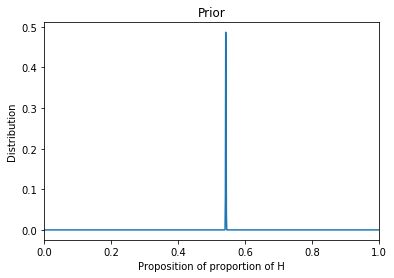

In [6]:
c1 = coin(0.5)

for i in range(0,1000):
    c1.toss()

print(c1.H(), c1.T())
c1.plot(0)

50 0


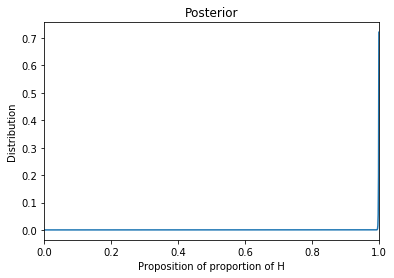

In [3]:
c2 = coin(1)

for i in range(0,50):
    c2.toss()

print(c2.H(), c2.T())
c2.plot(1)

Notes:
If we have nuisance parameter that we don't care about then we sum over all the possible options